In [32]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [33]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [34]:
digits = load_digits(as_frame=True)
X, y = digits.data, digits.target

In [35]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


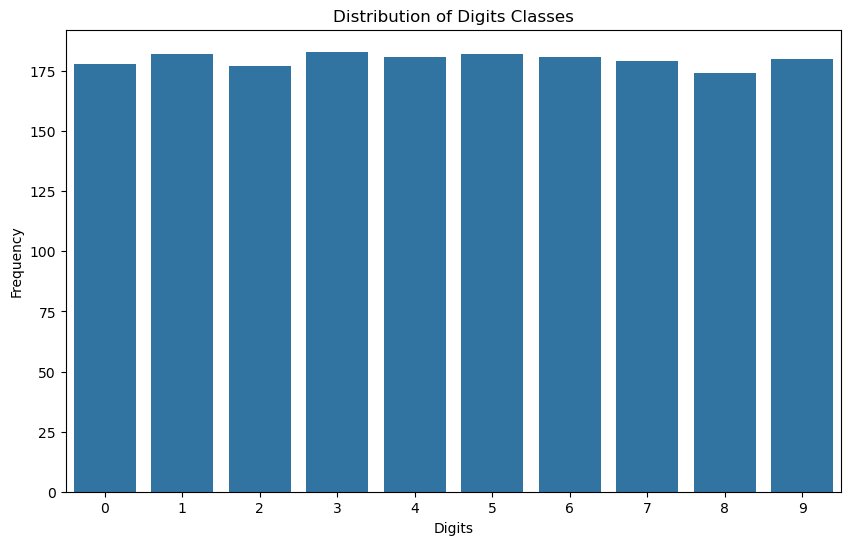

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title("Distribution of Digits Classes")
plt.xlabel("Digits")
plt.ylabel("Frequency")
plt.show()

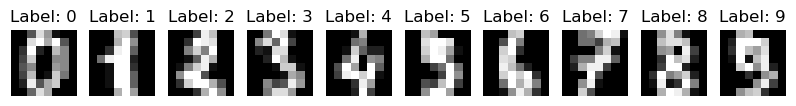

In [37]:
fig, axes = plt.subplots(1, 10, figsize=(10, 4))
for ax, img, label in zip(axes, digits.images, digits.target):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {label}")
plt.show()

# Check if data is linearly or non linearly seperable

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[ -1.11561888,  21.34068907],
       [  7.95480639, -20.66122899],
       [  7.01667045,  -9.87305451],
       ...,
       [ 10.73240627,  -7.04862632],
       [ -4.93052495,  12.24961225],
       [ -0.36160377,   6.32843165]])

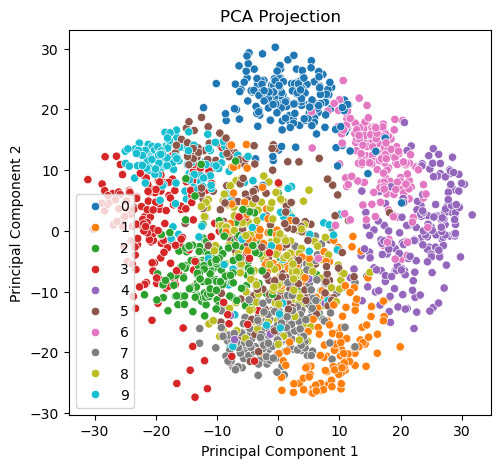

In [40]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10')
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc = "best")

# Check if pre-processing like scaling would help

In [41]:
print("Feature Min:", X.min(axis=0))
print("Feature Max:", X.max(axis=0))

Feature Min: pixel_0_0    0.0
pixel_0_1    0.0
pixel_0_2    0.0
pixel_0_3    0.0
pixel_0_4    0.0
            ... 
pixel_7_4    0.0
pixel_7_5    0.0
pixel_7_6    0.0
pixel_7_7    0.0
target       0.0
Length: 65, dtype: float64
Feature Max: pixel_0_0     0.0
pixel_0_1     8.0
pixel_0_2    16.0
pixel_0_3    16.0
pixel_0_4    16.0
             ... 
pixel_7_4    16.0
pixel_7_5    16.0
pixel_7_6    16.0
pixel_7_7    16.0
target        9.0
Length: 65, dtype: float64


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

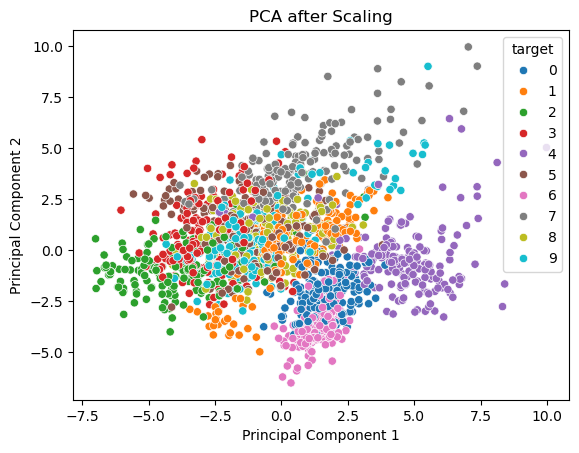

In [43]:
X_pca_scaled = pca.fit_transform(X_scaled)

sns.scatterplot(x = X_pca_scaled[:, 0], y = X_pca_scaled[:, 1], hue=y, palette="tab10")
plt.title("PCA after Scaling")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [44]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [45]:
X = df.drop('target', axis = 1)

In [46]:
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [47]:
y = df['target']

In [48]:
y.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

In [49]:
X_scaled = scaler.fit_transform(X)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
k_values = [1, 3, 5, 7]
knn_accuracies = {}
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    knn_accuracies[k] = accuracy_score(y_test, y_pred_knn)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)  
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print("KNN: ")
print(knn_accuracies)
print("SVM: ")
print(svm_accuracy)
print("Decision Tree: ")
print(dt_accuracy)

KNN: 
{1: 0.9777777777777777, 3: 0.9833333333333333, 5: 0.9861111111111112, 7: 0.9888888888888889}
SVM: 
0.9861111111111112
Decision Tree: 
0.8416666666666667


# USING SCALED X TRAIN

In [54]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7]
knn_accuracies_scaled = {}
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    knn_accuracies_scaled[k] = accuracy_score(y_test, y_pred_knn)

In [59]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
svm_accuracy_scaled = accuracy_score(y_test, y_pred_svm)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)  
y_pred_dt = dt.predict(X_test)
dt_accuracy_scaled = accuracy_score(y_test, y_pred_dt)

print("KNN: ")
print(knn_accuracies_scaled)
print("SVM: ")
print(svm_accuracy_scaled)
print("Decision Tree: ")
print(dt_accuracy_scaled)

KNN: 
{1: 0.9777777777777777, 3: 0.9694444444444444, 5: 0.975, 7: 0.9722222222222222}
SVM: 
0.9805555555555555
Decision Tree: 
0.8416666666666667
